In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets        import load_iris, load_breast_cancer
#데이터 분류 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
#분류 알고리즘
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression, LinearRegression
from sklearn.impute          import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
def metrics_eval(target, prediction) : 
    print('accuracy  - ' , accuracy_score(target, prediction))
    print('recall    - ' , recall_score(target, prediction))
    print('precision - ' , precision_score(target, prediction))
    print('f1 score  - ' , f1_score(target, prediction))
    print()
    print('confusion_matrix - \n' , confusion_matrix(target, prediction))

### Regression(회귀)
- 회귀 : 종속변수(타겟)와 하나 이상의 독립변수(피처)간의 관계를 모델링 하는 선형 또는 비선형 접근법
- 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다.
- 회귀분석은 데이터의 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b
- w : weight , b : bias
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- 회귀계수(coefficients) : 독립변수가 종속변수에 미치는 영향의 강도
- 회귀 유형 : 독립변수가 1개면  --> 단일 회귀(or 선형 회귀)
- 회귀유형 : 독립변수가 여러개면 -> 다중 회귀(or 비선형 회귀)

In [3]:
print('단일회귀 예시 데이터 ') 
print()
frm = pd.DataFrame({
  "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.75, 1.78, 1.80, 1.83],
  "mass"   : [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 68.92]
})
frm

단일회귀 예시 데이터 



,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.57,55.84
4,1.60,57.20
5,1.63,58.57
6,1.65,59.93
7,1.68,61.29
8,1.70,63.11
9,1.75,64.47


In [4]:
print("독립변수 또는 설명변수 - ") 
print('type - ' , type(frm[['height']]) , frm[['height']].shape)
X = frm[['height']]
display(X)
print()
print("종속변수 - ") 
print('type - ' , type(frm[['mass']]) , frm[['mass']].shape)
Y = frm[['mass']]
display(Y)

#변수에 모두 데이터 프레임 형태로 넣어줌

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


,height
0,1.47
1,1.50
2,1.52
3,1.57
4,1.60
5,1.63
6,1.65
7,1.68
8,1.70
9,1.75



종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


,mass
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


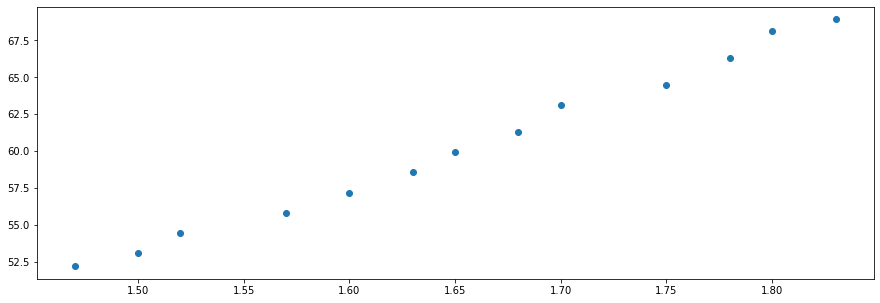

In [5]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')

plt.show()
plt.close()

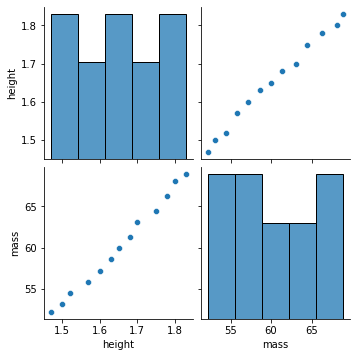

In [6]:
sns.pairplot(frm)
plt.show()
plt.close()

In [7]:
linear_model = LinearRegression()
linear_model.fit(X, Y)

LinearRegression()

In [8]:
#사용자 데이터를 입력하여 예측값을 확인

print('사용자 데이터를 입력하여 예측값을 확인 - ')
print()

user_pred = linear_model.predict([[1.78]])  #2차원 데이터가 들어가야함
# 1.78의 높이 일때 예측되는 질량
print('user pred - ' , user_pred)
print()

y_pred = linear_model.predict(X)
print('y_pred - \n' , y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 

user pred -  [[66.35713651]]

y_pred - 
 [[51.58119667]
 [53.01112633]
 [53.96441277]
 [56.34762888]
 [57.77755854]
 [59.2074882 ]
 [60.16077464]
 [61.5907043 ]
 [62.54399075]
 [64.92720685]
 [66.35713651]
 [67.31042295]
 [68.74035261]]


In [9]:
print("w = 기울기 : " , linear_model.coef_)
print()
print('b = 절편   : ' , linear_model.intercept_)

w = 기울기 :  [[47.66432207]]

b = 절편   :  [-18.48535678]


In [10]:
# y = wx + b 이므로 y_pred는 이렇게 구해진다.
y = (47.664 * 1.47) + -18.48
y

51.586079999999995

In [11]:
#R squared(결정 계수)
print('R = ' , linear_model.score(X,Y)) 

R =  0.9921046478305534


In [12]:
y_pred

array([[51.58119667],
       [53.01112633],
       [53.96441277],
       [56.34762888],
       [57.77755854],
       [59.2074882 ],
       [60.16077464],
       [61.5907043 ],
       [62.54399075],
       [64.92720685],
       [66.35713651],
       [67.31042295],
       [68.74035261]])

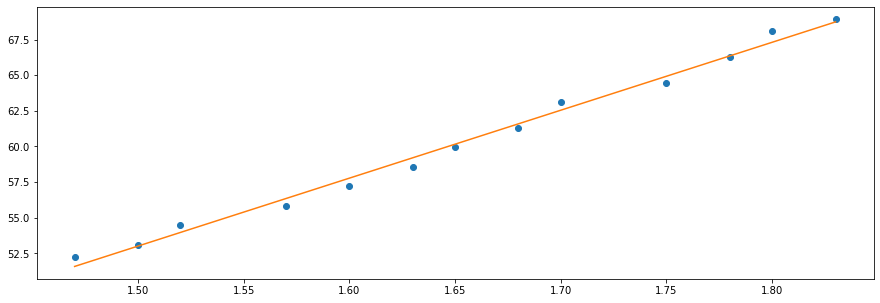

In [13]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')
plt.plot(X, y_pred)
# plt.plot(X, linear_model.predict(X)) #같은 내용

plt.show()
plt.close()

In [14]:
mpg_frm = pd.read_csv('./data/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
                    'wight', 'acc', 'model_year', 'origin', 'name']
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   wight         398 non-null    float64
 5   acc           398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
mpg_frm.describe()

#단위가 달라 데이터 크기가 많이 다름

,mpg,cylinders,displacement,wight,acc,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
mpg_frm['horsepower'].unique()   #? 발견

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [17]:
#?를 NaN으로 처리
mpg_frm['horsepower'].replace('?', np.nan, inplace=True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [18]:
#nan 데이터 제거
mpg_frm.dropna(subset=['horsepower'], axis=0, inplace=True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [19]:
#타입 변환
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [20]:
mpg_frm

,mpg,cylinders,displacement,horsepower,wight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [21]:
#다중회귀 - 회귀는 선형관계를 파악해야한다.

mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower', 'wight']]

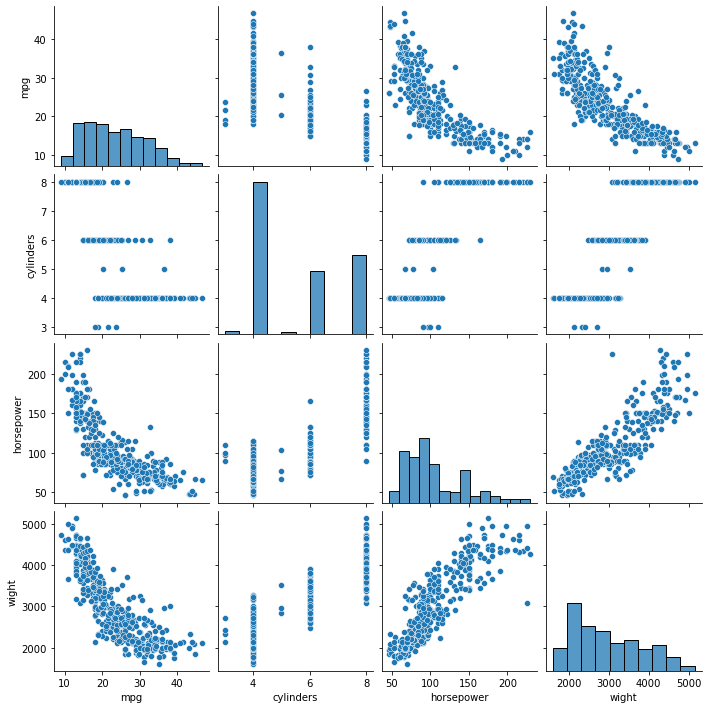

In [22]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()
#'horsepower', 'wight'가 강한 상관관계를 가짐

In [23]:
#종속변수(Y), 독립변수(X) 분리

Y = mpg_subset_frm['mpg']
X = mpg_subset_frm[['cylinders', 'horsepower', 'wight']]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=111)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [266]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, Y_train)

print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.342996523575195


In [267]:
print('모델의 신뢰도 - ')
y_squared = mpg_linear_model.score(X_test, Y_test)
y_squared

모델의 신뢰도 - 


0.7138561071545961

In [270]:
print('예측 - ')
y_pred = mpg_linear_model.predict(X_test)
y_pred

예측 - 


array([ 5.61631879,  8.89016346, 27.2669089 , 31.88069281, 23.77003928,
       31.37849609, 30.13820164, 19.94235449, 24.98243948, 24.2272539 ,
       26.6760677 , 14.3628994 , 17.07316274, 20.29093108, 22.69518569,
       27.83696941, 29.94503882,  7.3509445 , 16.34598892, 31.76450258,
       10.44191195, 29.30572823, 25.88252605, 16.37780319, 27.60231175,
       22.823972  , 26.82150912, 26.08717864, 28.6162761 , 27.89180831,
       28.47780922, 25.22563616, 18.88732413, 12.87520827, 25.33168373,
       12.12227054, 10.13846631, 15.65137735, 26.27429701, 26.736814  ,
       27.54384265, 30.27802152, 31.33956433, 24.81158265, 24.81265568,
       27.16246498, 31.20291257, 14.08536062,  7.98722991, 22.20053528,
       33.09433243, 24.08743401, 31.36789133, 19.76371842, 32.30171496,
       26.23187798, 15.39686319, 23.21073237, 29.70643179,  7.20215875,
       20.72255209,  9.07649468, 21.84983033, 29.25544374, 20.84163046,
       28.72428171, 29.30572823, 32.68498216, 30.30150824, 32.65

In [246]:
regression_actual_guess = pd.DataFrame({
        '실제 답':Y_test,
        '예측 값':y_pred
})
regression_actual_guess
#데이터셋이 정규분포를 따르면 매우 좋음

,실제 답,예측 값
95,12.0,5.616319
116,16.0,8.890163
273,23.9,27.266909
195,29.0,31.880693
194,22.5,23.770039
...,...,...
251,20.2,18.006986
201,18.5,19.622083
160,17.0,18.232860
210,19.0,23.531146


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


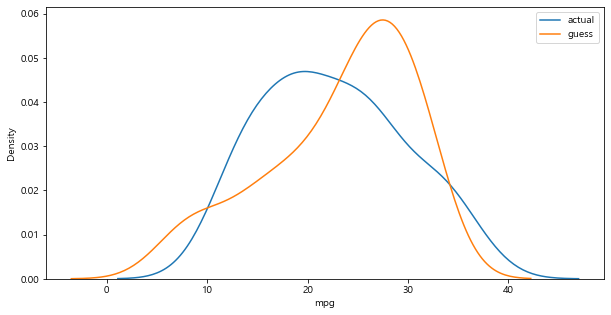

In [272]:
plt.figure(figsize=(10,5))

#밀도로 그림 그리기

ax1 = sns.distplot(Y_test, hist=False , label='actual')
ax2 = sns.distplot(y_pred, hist=False , label='guess')

plt.legend()
plt.show()
plt.close()

In [248]:
# 주택 임대료 예측 모델

house_frm = pd.read_csv('data/manhattan.csv')
house_frm

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [249]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [250]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [251]:
#NaN 없ㅇ니 바로 데이터 나누기

Y = house_frm['rent']
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

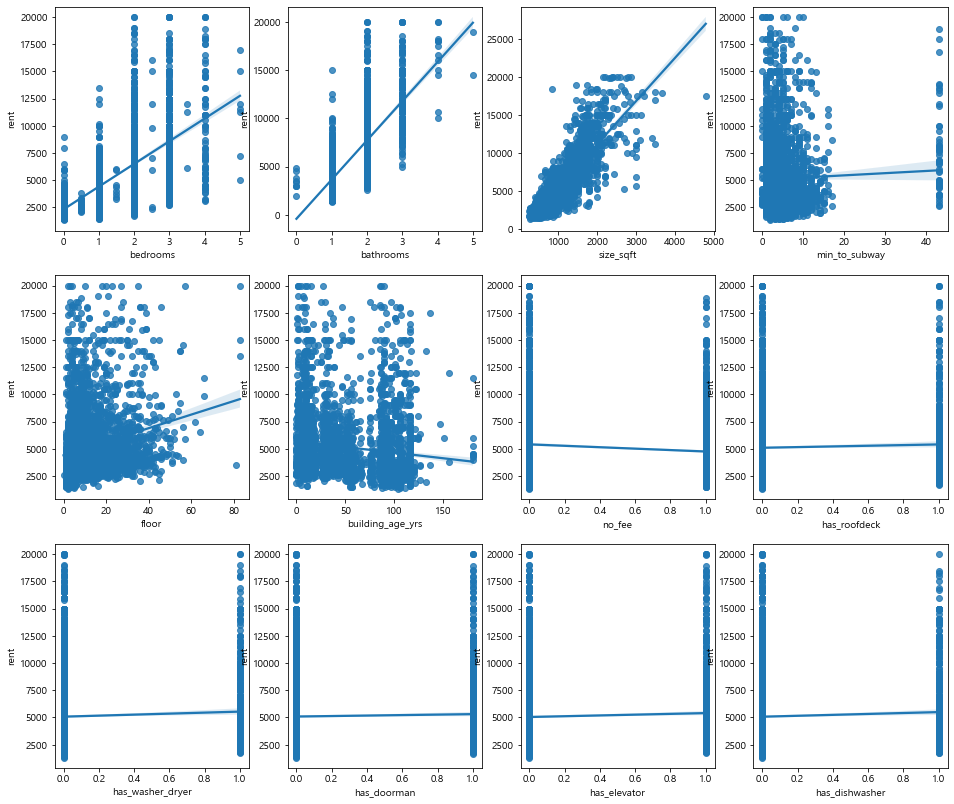

In [252]:
#상관 관계 분석을 위한 시각화

fig, axs = plt.subplots(figsize=(16, 14), ncols=4, nrows=3)

for idx, feature in enumerate(X):
    row = int(idx / 4)
    col = idx % 4
    sns.regplot(x=feature, y='rent', data=house_frm, ax=axs[row][col])

1. 데이터 셋 분리
2. 모델 생성 및 학습
3. 기울기 및 절편, 정확도 등 확인
4. 모델의 신뢰도(결정 계수) 확인
5. 사용자의 데이터를 넣어서 가격을 예측해보기
6. 실제 임대료와 예측 임대료 프레임 구축(데이터 프레임)
7. 산점도(scatter)를 이용하여 실제 임대료와 예측 임대료의 분포를 확인

In [253]:
#데이터 셋 분리
Y = house_frm['rent']
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]
house_frm

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [254]:
#모델 생성 및 학습
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=110)
house_linear_model = LinearRegression()
house_linear_model.fit(X_train, Y_train)

#기울기 및 절편, 정확도 등 확인
print("w = 기울기 : " , house_linear_model.coef_)
print()
print('b = 절편   : ' , house_linear_model.intercept_)
print()
print('모델의 신뢰도 - ')
y_squared = house_linear_model.score(X_test, Y_test)
print(y_squared)

w = 기울기 :  [-299.42381514 1292.6540434     4.76232273  -15.87274863   21.46740422
   -8.02612335 -125.93995338   36.8809954   211.1477962  -109.6169755
   61.53795678  -84.62819403]

b = 절편   :  -420.98156537568593

모델의 신뢰도 - 
0.7963865844972641


In [140]:
print('예측 - ')
y_pred = house_linear_model.predict(X_test)
print(y_pred)

예측 - 
[ 4740.84662167  9138.38823688  6364.06055208  3439.81131577
  3754.30450789  6422.66708481  2454.0882817   6165.55394803
  3182.33342883  3384.91724491  5831.78542469  4099.66417515
  7108.25908616  3788.32546936  5745.59500127  4758.66912669
  6838.36602102  4024.60383721  4482.63703284  3455.70493439
  2306.76197518  4659.34795192  4408.68701916  3594.55354647
  3464.36751105  8896.92994348 10765.16170795  5846.27380484
  4395.55856959  7787.48419625  3474.98430993  7424.54269336
  2249.03326371  1582.21550213  3218.56102646  5855.80033754
  4949.03092931  8476.17561001  3025.88527158  3360.75355992
  6328.15263849  4197.7915909   6523.33519621 12645.09752121
  3699.7811326   3202.97265262  2132.9050539   3626.78034245
  4018.26529504  7675.74168445  3746.10985596  7543.80856822
  7474.68421939 12242.88086613  2477.70644893  3284.84186183
  4356.09422386  7738.7012261   4617.22724666  3287.33116435
  3569.69073311 11977.97742636  2665.38179812  3848.87603737
  4455.6674573   3

In [200]:
#사용자의 데이터를 넣어서 가격을 예측해보기
my_apt = [[2, 1, 620, 10, 11, 12, 0, 0, 1, 0, 1, 1]]
user_pred = house_linear_model.predict(my_apt)
user_pred

array([3394.62298036])

In [183]:
X.loc[0]

bedrooms              0.0
bathrooms             1.0
size_sqft           480.0
min_to_subway         9.0
floor                 2.0
building_age_yrs     17.0
no_fee                1.0
has_roofdeck          1.0
has_washer_dryer      0.0
has_doorman           0.0
has_elevator          1.0
has_dishwasher        1.0
Name: 0, dtype: float64

In [162]:
#실제 임대료와 예측 임대료 프레임 구축(데이터 프레임)
regression_actual_guess = pd.DataFrame({
        'actual':Y_test,
        'guess':y_pred
})
regression_actual_guess

,actual,guess
3470,4795,4740.846622
496,9350,9138.388237
2746,4800,6364.060552
1634,3050,3439.811316
1082,3795,3754.304508
...,...,...
2719,2700,3545.217105
3392,1750,2520.976888
3127,2395,2284.248509
1718,5000,3045.950268


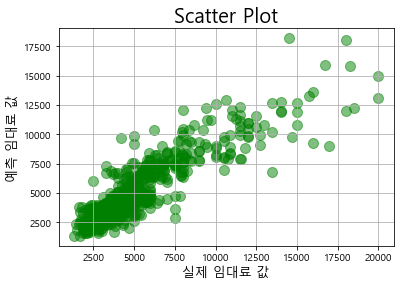

In [199]:
#산점도(scatter)를 이용하여 실제 임대료와 예측 임대료의 분포를 확인
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

df = regression_actual_guess.copy()

plt.title("Scatter Plot", fontsize=20)
plt.scatter(Y_test, y_pred, color='green', alpha=0.5, s=100)
plt.xlabel("실제 임대료 값", fontsize=13)
plt.ylabel("예측 임대료 값", fontsize=13)
plt.grid()
plt.show()

In [195]:
#프레임의 데이터를 넣어서 가격을 예측해보기
for i in list(range(20)):
    print(i)
    test_pred = house_linear_model.predict([X.loc[i]])  #2차원 데이터가 들어가야함
    print('test_pred - ' , user_pred)
    print("실제 데이터", Y.loc[i])
    print()

0
test_pred -  [4952.04382103]
실제 데이터 2550

1
test_pred -  [4952.04382103]
실제 데이터 11500

2
test_pred -  [4952.04382103]
실제 데이터 4500

3
test_pred -  [4952.04382103]
실제 데이터 4795

4
test_pred -  [4952.04382103]
실제 데이터 17500

5
test_pred -  [4952.04382103]
실제 데이터 3800

6
test_pred -  [4952.04382103]
실제 데이터 1995

7
test_pred -  [4952.04382103]
실제 데이터 2995

8
test_pred -  [4952.04382103]
실제 데이터 15000

9
test_pred -  [4952.04382103]
실제 데이터 4650

10
test_pred -  [4952.04382103]
실제 데이터 2950

11
test_pred -  [4952.04382103]
실제 데이터 6920

12
test_pred -  [4952.04382103]
실제 데이터 4875

13
test_pred -  [4952.04382103]
실제 데이터 4850

14
test_pred -  [4952.04382103]
실제 데이터 3700

15
test_pred -  [4952.04382103]
실제 데이터 4200

16
test_pred -  [4952.04382103]
실제 데이터 2195

17
test_pred -  [4952.04382103]
실제 데이터 4200

18
test_pred -  [4952.04382103]
실제 데이터 9000

19
test_pred -  [4952.04382103]
실제 데이터 4950



### 성능 지표

In [210]:
iris = load_iris()
print("타입", type(iris))
print("키 값", iris.keys())
print("0->setosa / 1->versicolor / 2->virginica")

타입 <class 'sklearn.utils.Bunch'>
키 값 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
0->


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [215]:
# 종속 변수
Y = pd.DataFrame(data=iris.target, columns=['species'])
display(Y)
print()
print()
#독립변수
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(X)


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [218]:
Y['species'] = Y['species'].replace([0,1,2], ['setosa', 'versicolor', 'virginica'])
iris_frm = pd.concat([X, Y], axis = 1)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


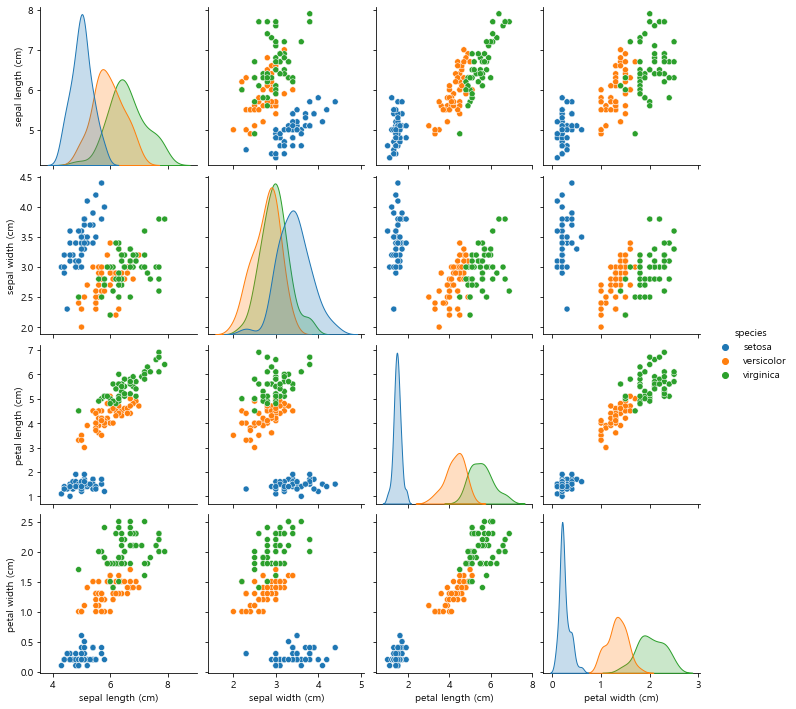

In [220]:
# sns.pairplot(iris_frm) #이거랑 다름
sns.pairplot(iris_frm, hue='species')

In [222]:
#원상 복귀
iris_frm['species'] = iris_frm['species'].replace(['setosa', 'versicolor', 'virginica'], [0,1,2])
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [223]:
#sepal length (cm)를 예측해보자
# 독립 변수
X = iris_frm.drop('sepal length (cm)', axis=1)
# 종속 변수
Y = iris_frm['sepal length (cm)']

In [225]:
iris_model = LinearRegression()
iris_model.fit(X, Y)

r_squared = iris_model.score(X, Y)
print("신뢰도", r_squared)

신뢰도 0.8621931701975808


In [226]:
#모델 시험
user_pred = iris_model.predict([[4.2, 1.3, 0.2, 1]])
user_pred

array([5.13591913])

In [231]:
#모델 생성 및 학습
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=110)
iris_model2 = LinearRegression()
iris_model2.fit(X_train, Y_train)

#기울기 및 절편, 정확도 등 확인
print("w = 기울기 : " , iris_model2.coef_)
print()
print('b = 절편   : ' , iris_model2.intercept_)
print()
y_squared = iris_model2.score(X_test, Y_test)
print('모델의 신뢰도 - ', y_squared)

w = 기울기 :  [ 0.59431331  0.74584161 -0.4377144  -0.19052175]

b = 절편   :  1.961501673057163

모델의 신뢰도 -  0.6692872366670797


In [228]:
print('예측 - ')
y_pred = iris_model2.predict(X_test)
print(y_pred)

regression_actual_guess = pd.DataFrame({
        'actual':Y_test,
        'guess':y_pred
})
regression_actual_guess

예측 - 
[7.26523676 5.55223825 4.85024529 5.67160797 5.10413756 5.51923142
 5.62412124 6.07264033 6.13257872 5.6784142  5.00042773 6.68958563
 6.2822541  6.22231571 6.62192498 5.01338645 5.13233777 6.25363549
 5.93913189 6.20935699 4.74535547 6.53732636 5.85057489 5.14622195
 6.16119733 4.97231618 4.93880229 5.92397906 6.41525547 4.75932831]


,actual,guess
118,7.7,7.265237
53,5.5,5.552238
25,5.0,4.850245
59,5.2,5.671608
21,5.1,5.104138
81,5.5,5.519231
62,6.0,5.624121
90,5.5,6.072640
97,6.2,6.132579
106,4.9,5.678414


In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#값 들을 모두 만족하는 선을 구하는? 함수

In [239]:
#성능 평가 지표
print("mae  : ", mean_absolute_error(Y_test, y_pred))
# mean error는 직관적인 값을 제공하지만 절댓값이므로 오버피팅인지 언더피팅인지 구분 못함
print("mse  : ", mean_squared_error(Y_test, y_pred))
# mse
print("rmse : ", np.sqrt(mean_squared_error(Y_test, y_pred)))
# rmse : mse에 제곱을 함
print("R    : ", iris_model2.score(X_test, Y_test))

mae        :  0.3213916321789911
mse        :  0.15657044592058225
rmse       :  0.39568983550324144
R          :  0.6692872366670797


In [273]:
#교재 131

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [274]:
#훈련 세트와 테스트 세트를 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                     perch_weight,
                                                                      random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [275]:
print(knr.predict([[50]]))

[1033.33333333]


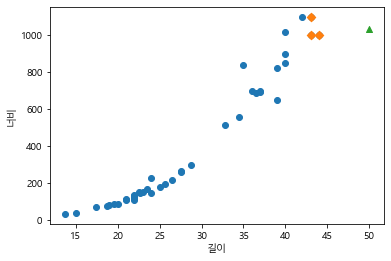

In [276]:
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#훈련 세트 중에 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('길이')
plt.ylabel('너비')
plt.show()

In [282]:
#농어에 대한 선형회귀

lr_model = LinearRegression()
lr_model.fit(train_input, train_target)
print("길이 50에 대한 농어 무게 예측 - ", lr_model.predict([[50]]))
print("기울기 : ", lr_model.coef_)
print("절편 값 : ", lr_model.intercept_)



def y_output(x):
    lr_model = LinearRegression()
    lr_model.fit(train_input, train_target)
    w = lr_model.coef_
    b = lr_model.intercept_
    
    output = w * x + b
    return output

길이 50에 대한 농어 무게 예측 -  [1241.83860323]
기울기 :  [39.01714496]
절편 값 :  -709.018644953547


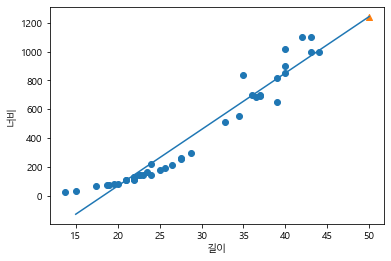

In [283]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [y_output(15), y_output(50)])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('길이')
plt.ylabel('너비')
plt.show()

In [284]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [287]:
#훈련 세트와 테스트 세트를 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                     perch_weight,
                                                                      random_state=42)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
print(type(poly.transform([[2, 3]])))

[[1. 2. 3. 4. 6. 9.]]
<class 'numpy.ndarray'>


In [288]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [290]:
lr = LinearRegression()
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982126
0.97145599115941


In [295]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
#

(42, 34)


In [296]:
lr = LinearRegression()
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9995286898073384
-6.786696453620098
